In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import itertools

## Plot for one climate zone, home type and vintage

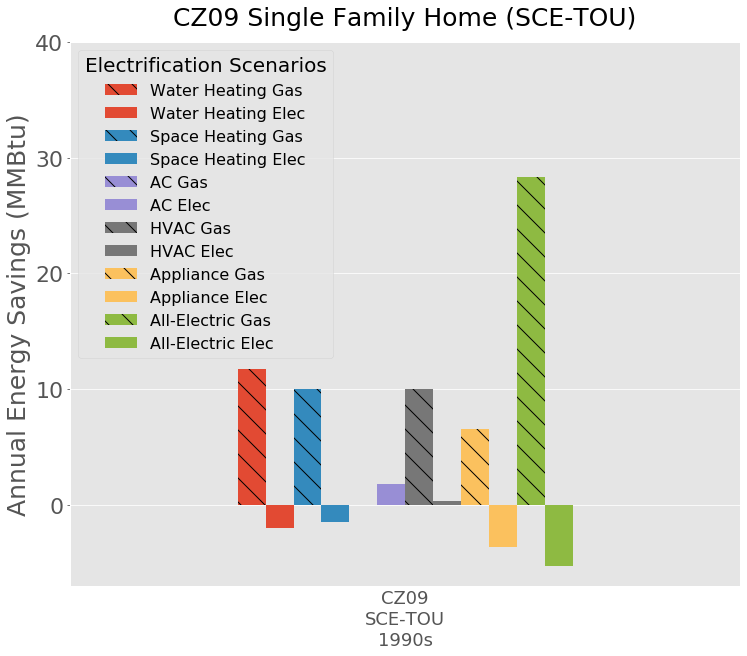

In [12]:
cz_str = ['CZ09',]
hy_str = ['SFH',]
#vt_str = ['1400','2100','2700']
vt_str = ['2100']
vt_dict = {
    '1400': 'Pre-1978',
    '2100': '1990s',
    '2700': 'New'
}

ele_util_dict = {
            'CZ03': ['PG&E',],
            'CZ04': ['PG&E',],
            'CZ12': ['SMUD',],
            'CZ06': ['SCE','LADWP','LADWPT1'],
            'CZ09': ['SCE',],
            'CZ10': ['SCE',], 
            }

util_trans = {
    'PG&E': 'PG&E-TOU',
    'SMUD': 'SMUD-TOU',
    'SCE': 'SCE-TOU',
    'LADWP': 'LADWP-TOU',
    'LADWPT1': 'LADWP-Tiered',
    'LADWPT2': 'LADWP-Tiered',
}

#Define colors for each scenario
std_colors = {
    'ac': (0.59607843137254901, 0.55686274509803924, 0.83529411764705885, 1.0), 
    'hvac': (0.46666666666666667, 0.46666666666666667, 0.46666666666666667, 1.0), 
    'appliance': (0.98431372549019602, 0.75686274509803919, 0.36862745098039218, 1.0), 
    'wh': (0.88627450980392153, 0.29019607843137257, 0.20000000000000001, 1.0), 
    'sh': (0.20392156862745098, 0.54117647058823526, 0.74117647058823533, 1.0), 
    'allele': (0.55686274509803924, 0.72941176470588232, 0.25882352941176473, 1.0)
}

ann_ele_sav_df = pd.DataFrame()
ann_gas_sav_df = pd.DataFrame()


for cz,hy,util,vt in itertools.product(cz_str,hy_str,ele_util_dict[cz],vt_str):

    output_path = os.path.join('S:\E3 Projects\SCE Building Electrification\Bill Calculation Analysis\sce_res_bldg_ele_output\\')
    sce_nm = cz+'_'+hy+'_'+vt+'_'+util

    readin_df = pd.read_csv(os.path.join(output_path,output_filenm),index_col=0)
    ann_ele_sav_df[cz+'\n'+util_trans[util]+'\n'+vt_dict[vt]] = readin_df['ele_sav_kwh']
    ann_gas_sav_df[cz+'\n'+util_trans[util]+'\n'+vt_dict[vt]] = readin_df['gas_sav_therm']

scens = ['wh','sh','ac','hvac','appliance','allele']
plot_ann_ele_sav = ann_ele_sav_df.reindex(scens) * kwh_to_mmbtu
plot_ann_gas_sav = ann_gas_sav_df.reindex(scens) * therm_to_mmbtu
index_map = {
    'sh_gas': 'Space Heating Gas',
    'wh_gas': 'Water Heating Gas',
    'ac_gas': 'AC Gas',
    'hvac_gas': 'HVAC Gas',
    'appliance_gas': 'Appliance Gas',
    'allele_gas':'All-Electric Gas',
    'sh_ele': 'Space Heating Elec',
    'wh_ele': 'Water Heating Elec',
    'ac_ele': 'AC Elec',
    'hvac_ele': 'HVAC Elec',
    'appliance_ele': 'Appliance Elec',
    'allele_ele':'All-Electric Elec'
}

plot_ann_ele_sav.reset_index(drop=True)
plot_ann_ele_sav.index=[scen+'_ele' for scen in scens]
plot_ann_gas_sav.reset_index(drop=True)
plot_ann_gas_sav.index=[scen+'_gas' for scen in scens]

plot_ann_sav_df = pd.concat([plot_ann_ele_sav,plot_ann_gas_sav])

allscens = ['wh_gas','wh_ele','sh_gas','sh_ele','ac_gas','ac_ele','hvac_gas','hvac_ele',\
            'appliance_gas','appliance_ele','allele_gas','allele_ele']

#reorder the index in the sequence of allscens
plot_ann_sav = plot_ann_sav_df.reindex(allscens)

#rename the index according to index_map to appear on Legend
ann_sav = plot_ann_sav.set_index(plot_ann_sav.index.map(index_map))

#set plot style
plt.style.use('ggplot')

#Plot!
ax = ann_sav.transpose().plot(kind='bar',figsize=(12,10),rot=0,legend=False,\
                              color=[std_colors[scen.split('_')[0]] for scen in allscens])

#Manually set gas savings as hatched bars
bars = ax.patches
patterns = ['\\',' ']*6
for bar,pattern in zip(bars,patterns):
    bar.set_hatch(pattern)


ax.set_title(cz+' Single Family Home ('+util_trans[util]+')',fontsize=25,y=1.02)

ax.set_ylim([-7,40])

#set ticks
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are on
    top=False,         # ticks along the top edge are off
    labelbottom=True,  # labels along the bottom edge are on
    length=0,)

ax.xaxis.grid(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)

#set yaxis label
ax.set_ylabel('Annual Energy Savings (MMBtu)',fontsize=25)

#set legend
lgnd = ax.legend(loc='upper left',fontsize=16,)
lgnd.set_title('Electrification Scenarios',prop = {'size':20,'weight':'medium'})

#plt.savefig(os.path.join('figures','ps_folder','energy_sav_sfh_'+cz.lower()+'_'+vt_dict[vt]+'_'+util_trans[util].lower()+'.pdf'),format='pdf')